In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [2]:
papers = pd.read_csv("tabela_1_ed_sem_2019.csv", index_col=[0])
papers.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [3]:
abstracts_full = papers[["Abstract", "Year"]]

In [4]:
stop = stopwords.words('english')

In [5]:
def freq_bigram_by_year(year):
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    #retirar a lematization, 16S é removido
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
    
    #bigramas aqui
    bigramFinder_year = nltk.collocations.BigramCollocationFinder.from_words(lemmatized_year)
    bigram_freq_year = bigramFinder_year.ngram_fd.items()
    bigramFreqTable_year = pd.DataFrame(list(bigram_freq_year), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    bigramFreqTable_year.to_csv("{}_bigram_freq.csv".format(year))
 

In [6]:
for i in range(2001,2019):
    freq_bigram_by_year(i)

In [7]:
#freq de todos
abstracts_all = abstracts_full["Abstract"]
abstracts_cat = abstracts_all.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_all_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_all_no_punct.lower()) 
  
filtered_sentence_all = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence_all.append(w)    

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_all = []

for w in filtered_sentence_all:
    lemmatized_w = wordnet_lemmatizer.lemmatize(w)
    lemmatized_all.append(lemmatized_w)
        
bigramFinder_all = nltk.collocations.BigramCollocationFinder.from_words(lemmatized_all)
bigram_freq_all = bigramFinder_all.ngram_fd.items()
bigramFreqTable_all = pd.DataFrame(list(bigram_freq_all), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

bigramFreqTable_all

,bigram,freq
28,"(type, strain)",13821
16,"(16, rrna)",13082
17,"(rrna, gene)",12456
18,"(gene, sequence)",11829
129,"(sp, nov)",10471
78,"(fatty, acid)",8252
123,"(novel, specie)",8084
124,"(specie, genus)",6813
40,"(sequence, similarity)",6794
130,"(nov, proposed)",6578


In [8]:
n_year = pd.DataFrame(abstracts_full["Year"].value_counts()).reset_index()
n_year


,index,Year
0,2015,903
1,2017,867
2,2013,853
3,2016,775
4,2014,757
5,2018,647
6,2012,560
7,2010,534
8,2011,534
9,2009,529


In [9]:
#nº de itens por ano
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Frequency,179,234,269,330,376,416,502,486,529,534,534,560,853,757,903,775,867,647


In [10]:
bigramFreqTable_2001 = pd.read_table('2001_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2002 = pd.read_table('2002_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2003 = pd.read_table('2003_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2004 = pd.read_table('2004_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2005 = pd.read_table('2005_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2006 = pd.read_table('2006_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2007 = pd.read_table('2007_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2008 = pd.read_table('2008_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2009 = pd.read_table('2009_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2010 = pd.read_table('2010_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2011 = pd.read_table('2011_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2012 = pd.read_table('2012_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2013 = pd.read_table('2013_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2014 = pd.read_table('2014_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2015 = pd.read_table('2015_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2016 = pd.read_table('2016_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2017 = pd.read_table('2017_bigram_freq.csv', sep=',', index_col=0)
bigramFreqTable_2018 = pd.read_table('2018_bigram_freq.csv', sep=',', index_col=0)

dfs = [bigramFreqTable_2001, bigramFreqTable_2002, bigramFreqTable_2003, bigramFreqTable_2004, bigramFreqTable_2005, bigramFreqTable_2006, bigramFreqTable_2007, bigramFreqTable_2008, bigramFreqTable_2009, bigramFreqTable_2010, bigramFreqTable_2011, bigramFreqTable_2012, bigramFreqTable_2013, bigramFreqTable_2014, bigramFreqTable_2015, bigramFreqTable_2016, bigramFreqTable_2017, bigramFreqTable_2018]
from functools import reduce

In [11]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='bigram'), dfs)
df_final.columns = ["bigram", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]

In [12]:
df_final = df_final.set_index("bigram")

In [13]:
df_final.head(3)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
bigram,,,,,,,,,,,,,,,,,,
"('type', 'strain')",195,278,283,401,481,573,703,743,830,796,744,813,1280,1182,1336,1100,1208,875
"('sp', 'nov')",175,235,253,382,426,482,576,545,614,584,575,614,896,800,939,815,900,660
"('16', 'rrna')",93,135,153,324,495,598,730,719,761,785,799,795,1214,1097,1246,1090,1187,861


In [14]:
relative = df_final.div(n_year_transposed.iloc[0])

In [15]:
transposed_relative = relative.T
transposed_relative

bigram,"('type', 'strain')","('sp', 'nov')","('16', 'rrna')","('new', 'specie')","('degree', 'c')","('fatty', 'acid')","('gc', 'content')","('rrna', 'gene')","('nov', 'type')","('dna-dna', 'hybridization')",...,"('chemotaxonomic', 'characterization')","('considered', 'represent')","('also', 'supported')","('profile', 'contained')","('short', 'rod')","('transcribed', 'spacer')","('similarity', 'dna-dna')","('strain', 'contained')","('ubiquinone', '10')","('phylogenetic', 'relative')"
2001,1.089385,0.977654,0.519553,0.508380,0.424581,0.407821,0.391061,0.363128,0.363128,0.357542,...,0.005587,0.005587,0.005587,0.005587,0.005587,0.005587,0.005587,0.005587,0.005587,0.005587
2002,1.188034,1.004274,0.576923,0.209402,0.529915,0.538462,0.384615,0.457265,0.363248,0.354701,...,0.004274,0.008547,0.021368,0.004274,0.008547,0.017094,0.012821,0.025641,0.004274,0.034188
2003,1.052045,0.940520,0.568773,0.189591,0.602230,0.579926,0.237918,0.501859,0.304833,0.308550,...,0.003717,0.003717,0.007435,0.003717,0.033457,0.007435,0.026022,0.018587,0.003717,0.022305
2004,1.215152,1.157576,0.981818,0.127273,0.412121,0.587879,0.375758,0.909091,0.351515,0.324242,...,0.006061,0.009091,0.009091,0.003030,0.015152,0.021212,0.018182,0.009091,0.003030,0.021212
2005,1.279255,1.132979,1.316489,0.106383,0.465426,0.712766,0.494681,1.263298,0.369681,0.356383,...,0.005319,0.029255,0.007979,0.005319,0.021277,0.013298,0.021277,0.015957,0.002660,0.034574
2006,1.377404,1.158654,1.437500,0.069712,0.473558,0.694712,0.533654,1.389423,0.382212,0.336538,...,0.002404,0.031250,0.004808,0.002404,0.019231,0.012019,0.024038,0.016827,0.007212,0.021635
2007,1.400398,1.147410,1.454183,0.053785,0.527888,0.846614,0.643426,1.392430,0.256972,0.294821,...,0.005976,0.055777,0.003984,0.003984,0.023904,0.003984,0.015936,0.025896,0.005976,0.027888
2008,1.528807,1.121399,1.479424,0.028807,0.582305,0.775720,0.635802,1.425926,0.288066,0.327160,...,0.004115,0.109053,0.008230,0.004115,0.039095,0.008230,0.008230,0.010288,0.008230,0.028807
2009,1.568998,1.160681,1.438563,0.034026,0.578450,0.780718,0.631380,1.400756,0.323251,0.332703,...,0.001890,0.130435,0.007561,0.003781,0.013233,0.017013,0.015123,0.026465,0.011342,0.020794
2010,1.490637,1.093633,1.470037,0.041199,0.565543,0.855805,0.653558,1.406367,0.314607,0.277154,...,0.003745,0.149813,0.007491,0.005618,0.026217,0.001873,0.018727,0.029963,0.009363,0.037453


In [16]:
new_specie = transposed_relative["('sp', 'nov')"]
new_specie.index.name = 'year'
new_specie = new_specie.reset_index()
new_specie.columns = ["year", "freq"]
new_specie.columns

Index(['year', 'freq'], dtype='object')

In [17]:
new_genus = transposed_relative["('gen', 'nov')"]
new_genus.index.name = 'year'
new_genus = new_genus.reset_index()
new_genus.columns = ["year", "freq"]
new_genus.columns

Index(['year', 'freq'], dtype='object')

In [18]:
s16_rrna = transposed_relative["('16', 'rrna')"]
s16_rrna.index.name = 'year'
s16_rrna = s16_rrna.reset_index()
s16_rrna.columns = ["year", "freq"]
s16_rrna.columns

Index(['year', 'freq'], dtype='object')

In [19]:
fatty_acid = transposed_relative["('fatty', 'acid')"]
fatty_acid.index.name = 'year'
fatty_acid = fatty_acid.reset_index()
fatty_acid.columns = ["year", "freq"]
fatty_acid.columns

Index(['year', 'freq'], dtype='object')

In [20]:
gc_content = transposed_relative["('gc', 'content')"]
gc_content.index.name = 'year'
gc_content = gc_content.reset_index()
gc_content.columns = ["year", "freq"]
gc_content.columns

Index(['year', 'freq'], dtype='object')

In [21]:
phylogenetic_analysis = transposed_relative["('phylogenetic', 'analysis')"]
phylogenetic_analysis.index.name = 'year'
phylogenetic_analysis = phylogenetic_analysis.reset_index()
phylogenetic_analysis.columns = ["year", "freq"]
phylogenetic_analysis.columns

Index(['year', 'freq'], dtype='object')

In [22]:
polar_lipid = transposed_relative["('polar', 'lipid')"]
polar_lipid.index.name = 'year'
polar_lipid = polar_lipid.reset_index()
polar_lipid.columns = ["year", "freq"]
polar_lipid.columns

Index(['year', 'freq'], dtype='object')

In [23]:
dna_hybridization = transposed_relative["('dna-dna', 'hybridization')"]
dna_hybridization.index.name = 'year'
dna_hybridization = dna_hybridization.reset_index()
dna_hybridization.columns = ["year", "freq"]
dna_hybridization.columns

Index(['year', 'freq'], dtype='object')

In [24]:
respiratory_quinone = transposed_relative["('respiratory', 'quinone')"]
respiratory_quinone.index.name = 'year'
respiratory_quinone = respiratory_quinone.reset_index()
respiratory_quinone.columns = ["year", "freq"]
respiratory_quinone.columns

Index(['year', 'freq'], dtype='object')

Text(0.91,0.3,'respiratory quinone')

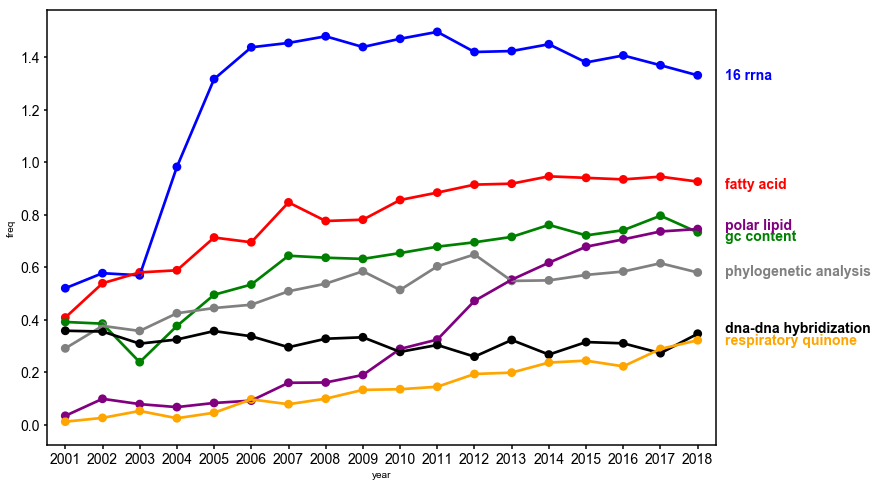

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(12,8))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.pointplot(x="year", y="freq", data=s16_rrna, color="blue")
fig.text(x = 0.91, y = 0.76, s = "16 rrna", family='sans-serif', fontsize=14, weight = "bold", color="blue")
sns.pointplot(x="year", y="freq", data=fatty_acid, color="red")
fig.text(x = 0.91, y = 0.57, s = "fatty acid", family='sans-serif', fontsize=14, weight = "bold", color="red")
sns.pointplot(x="year", y="freq", data=gc_content, color="green")
fig.text(x = 0.91, y = 0.48, s = "gc content", family='sans-serif', fontsize=14, weight = "bold", color="green")
sns.pointplot(x="year", y="freq", data=phylogenetic_analysis, color="grey")
fig.text(x = 0.91, y = 0.42, s = "phylogenetic analysis", family='sans-serif', fontsize=14, weight = "bold", color="grey")
sns.pointplot(x="year", y="freq", data=polar_lipid, color="purple")
fig.text(x = 0.91, y = 0.50, s = "polar lipid", family='sans-serif', fontsize=14, weight = "bold", color="purple")
sns.pointplot(x="year", y="freq", data=dna_hybridization, color="black")
fig.text(x = 0.91, y = 0.32, s = "dna-dna hybridization", family='sans-serif', fontsize=14, weight = "bold", color="black")
sns.pointplot(x="year", y="freq", data=respiratory_quinone, color="orange")
fig.text(x = 0.91, y = 0.30, s = "respiratory quinone", weight = "bold", family='sans-serif', fontsize=14, color="orange")
